In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import seaborn as sns
import missingno as msno
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/content/drive/MyDrive/0.data/heart_2020_final.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,1,27.41,1,0,0,7.0,0.0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
301713,0,29.84,1,0,0,0.0,0.0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
301714,0,24.24,0,0,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
301715,0,32.81,0,0,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### 이상치 데이터

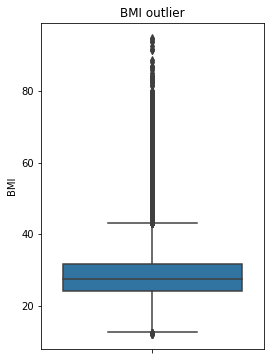

In [8]:
# BMI 이상치 데이터 시각화
plt.figure(figsize = (4,6))
plt.title('BMI outlier')
plt.ylabel('BMI')

sns.boxplot(y = "BMI",  data = df);

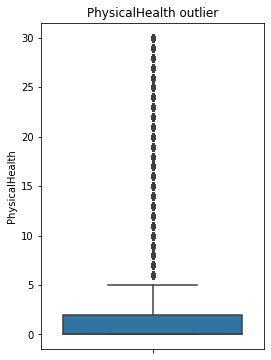

In [9]:
# PhysicalHealth 이상치 데이터 시각화
plt.figure(figsize = (4,6))
plt.title('PhysicalHealth outlier')
plt.ylabel('PhysicalHealth')

sns.boxplot(y = "PhysicalHealth",  data = df);

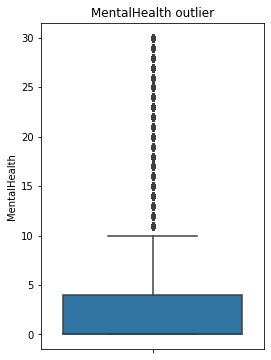

In [10]:
# MentalHealth 이상치 데이터 시각화
plt.figure(figsize = (4,6))
plt.title('MentalHealth outlier')
plt.ylabel('MentalHealth')

sns.boxplot(y = "MentalHealth",  data = df);

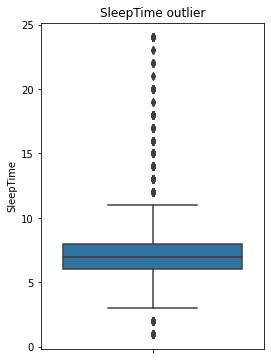

In [11]:
# SleepTime 이상치 데이터 시각화
plt.figure(figsize = (4,6))
plt.title('SleepTime outlier')
plt.ylabel('SleepTime')
sns.boxplot(y = "SleepTime",  data = df);

# 결측치 시각화

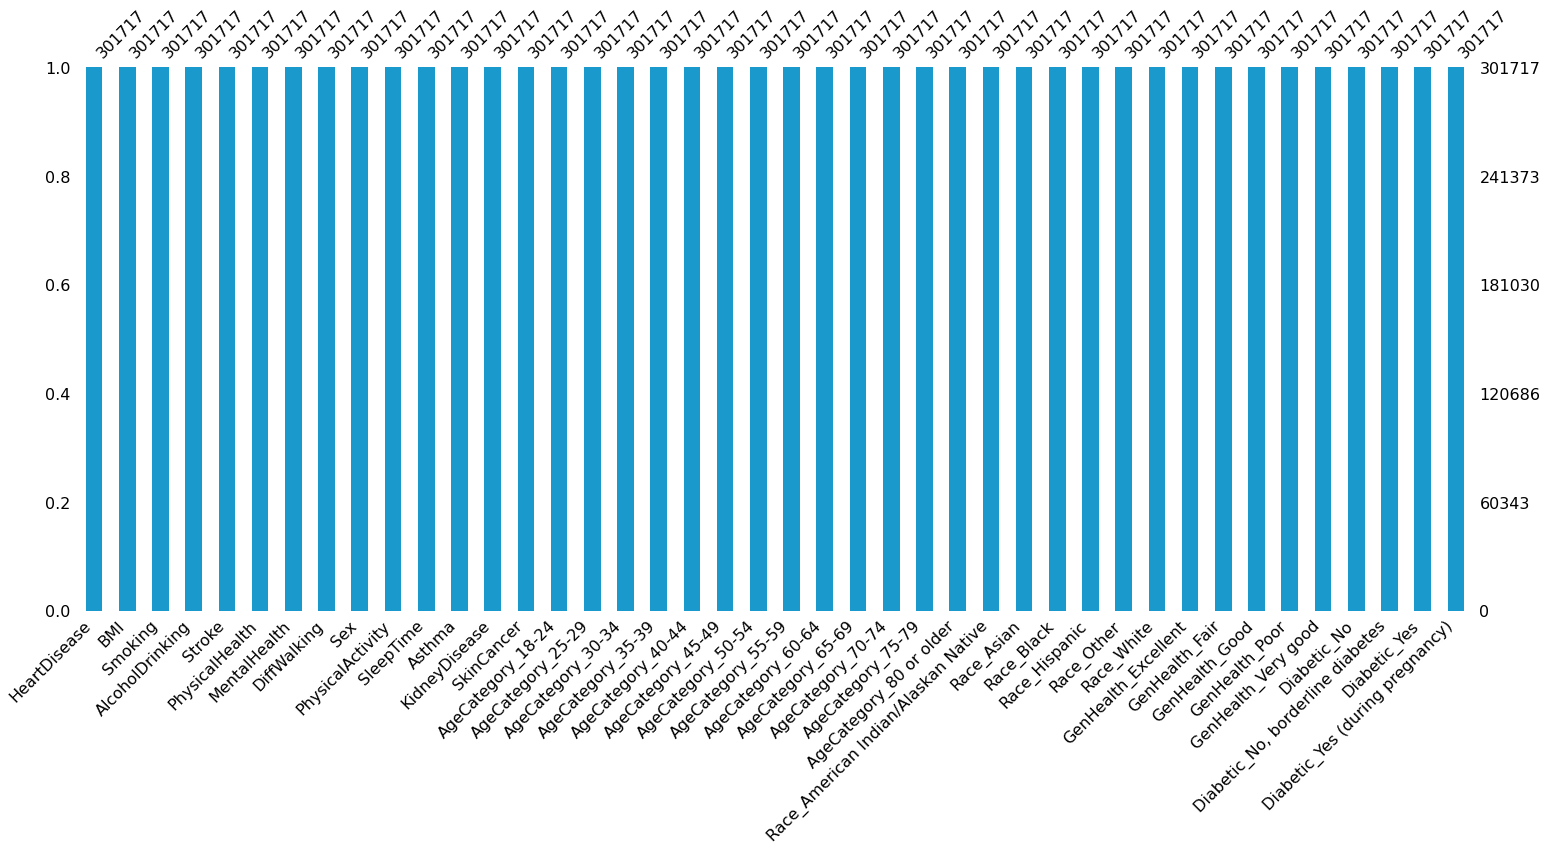

In [12]:
# 결측치 시각화
msno.bar(df, color=(0.1, 0.6, 0.8));

# 타겟변수 시각화

0    274456
1     27261
Name: HeartDisease, dtype: int64


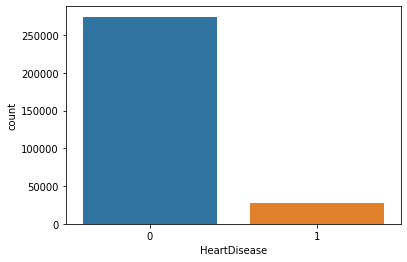

In [13]:
sns.countplot(x = df['HeartDisease'])
print(df['HeartDisease'].value_counts())

# 연속형 변수 시각화

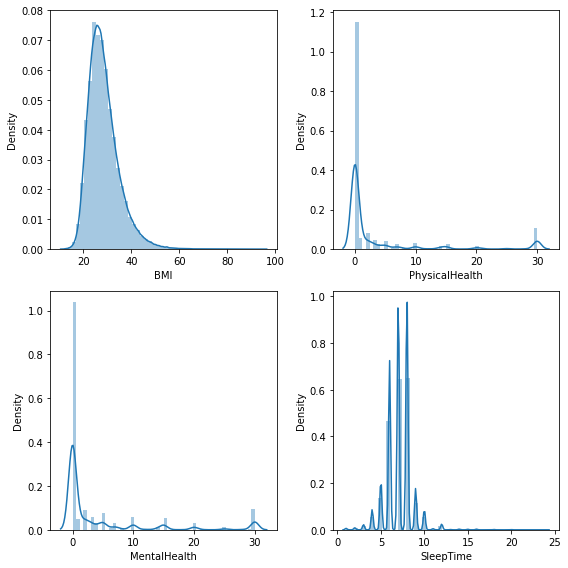

In [14]:
# 분포 그래프
plt.figure(figsize = (8,8))

# BMI
plt.subplot(2, 2, 1) 
sns.distplot(df['BMI'])

# PhysicalHealth
plt.subplot(2, 2, 2) 
sns.distplot(df['PhysicalHealth'])

# MentalHealth
plt.subplot(2, 2, 3) 
sns.distplot(df['MentalHealth'])

# SleepTime
plt.subplot(2, 2, 4) 
sns.distplot(df['SleepTime'])

plt.tight_layout()
plt.show()

# 범주형 변수 시각화

In [15]:
def add_trace_v(fig, df, column, row_num, col_num):
    fig.add_trace(go.Pie(labels=np.array(df[column].value_counts().index),
    values=[x for x in df[column].value_counts()], hole=.35,
    textinfo='label+percent', rotation=-45, marker_colors= ['#4285f4', '#ea4335', '#fbbc05', '#34a853']),
    row=row_num, col=col_num)

In [16]:
def cat_vis(df):
       vis_col = ['HeartDisease', 'Smoking',
              'AlcoholDrinking', 'Stroke',
              'DiffWalking', 'Sex',
              'Race', 'PhysicalActivity',
              'Diabetic','GenHealth',
              'Asthma', 'KidneyDisease','SkinCancer']

       fig = make_subplots(
              rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                          "AlcoholDrinking","Stroke",
                                          "DiffWalking", "Sex",
                                          'Race', 'PhysicalActivity',
                                          'Diabetic','GenHealth',
                                          'Asthma', 'KidneyDisease',
                                          'SkinCancer'),
              specs=[[{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}],
              [{"type": "domain"}, {"type": "domain"}]],
       )

       idx = 0
       for r in range(1,8):
              for c in range(1,3):
                     add_trace_v(fig, df, vis_col[idx], r,c)
                     if idx < 11:
                            idx += 1

       fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

       fig.show()

In [17]:
df2 = pd.read_csv('/content/drive/MyDrive/0.data/heart_2020_cleaned.csv')

# 심장질환이 없는 사람의 범주형 변수 시각화

In [18]:
Heart_X_df = df2[df2['HeartDisease'] == 'No']
cat_vis(Heart_X_df)

# 심장질환이 있는 사람의 범주형 변수 시각화

In [19]:
Heart_O_df = df2[df2['HeartDisease'] == 'Yes']
cat_vis(Heart_O_df)

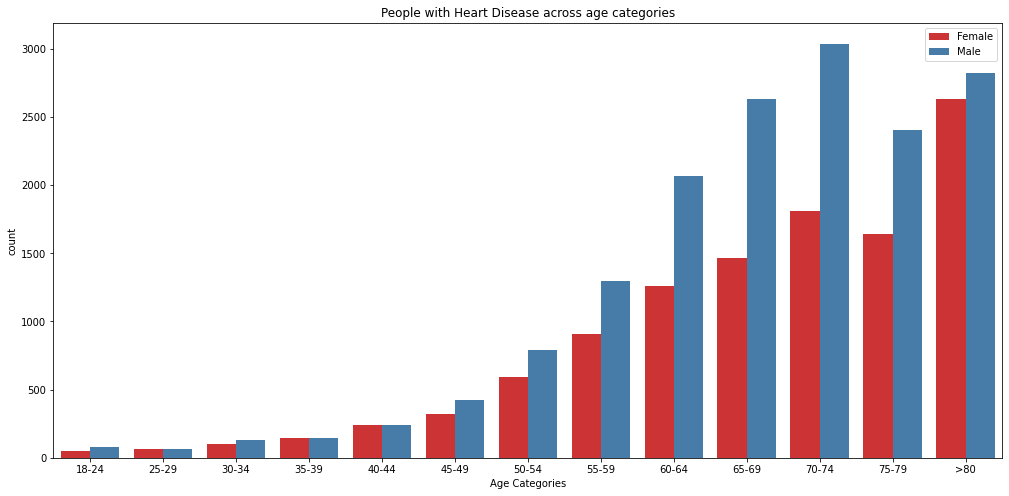

In [20]:
df2.loc[df2.AgeCategory=='80 or older','AgeCategory'] = '>80'
order = pd.unique(df2.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df2[df2['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.title('People with Heart Disease across age categories')
plt.xlabel('Age Categories')
plt.legend(['Female','Male'])
plt.show()

# 연속형 변수 상관관계 시각화

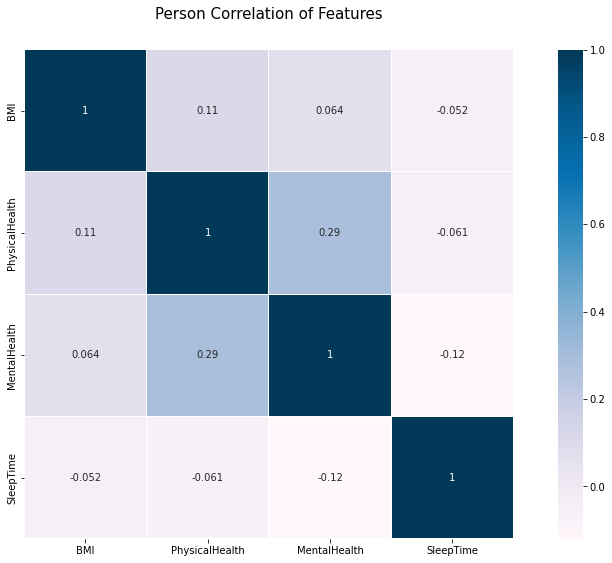

In [21]:
colormap = plt.cm.PuBu
plt.figure(figsize=(16,9))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df2.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})
plt.show()

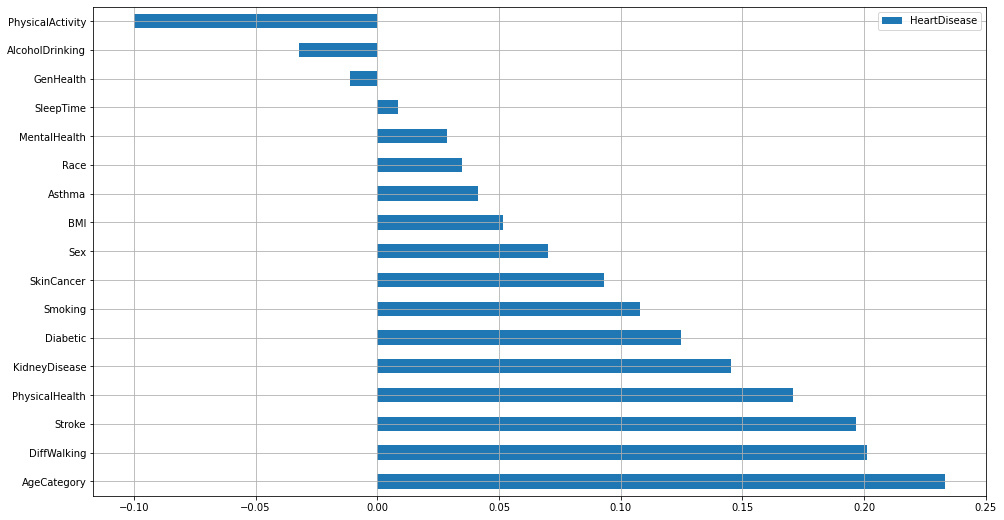

In [23]:
df3 = pd.read_csv('/content/drive/MyDrive/0.data/heart_2020_before_onehot.csv')
corr = pd.DataFrame(df3.corr()['HeartDisease']).drop('HeartDisease',axis=0).sort_values(by = 'HeartDisease',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(16,9))